
# An Introduction to Model Definition and Simulation using Epydemix

Welcome to this tutorial on **epydemix**, a Python library designed for epidemiological modeling and simulations. In this tutorial, we will guide you through the process of defining a simple epidemiological model and running simulations to explore how diseases spread over time.

We will start by explaining the key concepts in epidemiological modeling, and then move on to hands-on examples using **epydemix**.

Let’s begin by setting up our environment!



## Installation

First, if you haven’t already installed **epydemix**, you can do so by running the following command:


In [1]:
#!pip install epydemix


Now, let’s import the necessary modules.


In [2]:
# Import the necessary components
from epydemix import EpiModel
from epydemix.visualization import plot_quantiles

## Understanding the Basics of Epidemiological Modeling

Before diving into code, let’s quickly go over the basic structure of an epidemiological compartmental model.

Compartmental models are used to describe how diseases spread through populations. These models divide the population into compartments, each representing a specific state in the progression of the disease. One of the simplest models is the **SIR model**, where:

- **S** represents the susceptible individuals (those who can get infected).
- **I** represents the infected individuals (those who are currently carrying the disease).
- **R** represents the recovered individuals (those who have recovered and are immune).

In compartmental models, individuals move between compartments through transitions, which are of two main types:

- **Mediated Transitions**: These transitions occur due to interactions between individuals in different compartments. In the case of the SIR model, the transition from **S** (susceptible) to **I** (infected) is mediated by the presence of infected individuals. The rate at which susceptibles become infected depends on both the number of infected individuals and the transmission rate.
  
  For example, the transition from **S** to **I** happens at a rate proportional to:

  $$\textit{Transition rate} \sim \beta \times S \times I $$
  
  where:
  - $\beta$ is the transmission rate,
  - $S$ is the number of susceptible individuals,
  - $I$ is the number of infected individuals.

- **Spontaneous Transitions**: These transitions happen independently of interactions with other compartments. For instance, in the SIR model, the transition from **I** (infected) to **R** (recovered) is spontaneous because infected individuals recover based on a fixed recovery rate without needing to interact with any other compartment.
  
  This transition from **I** to **R** occurs at a rate proportional to:
  
  $$\textit{Transition rate} \sim \gamma \times I $$

  where:
  - $\gamma$ is the recovery rate,
  - $I$ is the number of infected individuals.

The dynamics of the disease over time are shaped by these transitions, as individuals move between susceptible, infected, and recovered states.

Now, let's see how we can define a simple SIR model using **epydemix**.



## Defining a Basic Model

In **epydemix**, defining a model is as simple as specifying the compartments and parameters that govern the dynamics of disease transmission. Let’s start with a **Basic SIR Model**:


In [3]:
# Defining a basic SIR model
sir_model = EpiModel(
    name='SIR Model',
    compartments=['S', 'I', 'R'],  # Susceptible, Infected, Recovered
    parameters={
        'beta': 0.3,  # Transmission rate
        'gamma': 0.1  # Recovery rate
    }
)

# Defining the transitions
sir_model.add_transition(source='S', target='I', rate='beta', agent='I')
sir_model.add_transition(source='I', target='R', rate='gamma')

print(sir_model)

EpiModel(name='SIR Model')
Compartments: 3
  S, I, R
Transitions: 2
  Transitions between compartments:
    S -> I, rate: beta
    I -> R, rate: gamma
Parameters: 2
  Model parameters:
    beta: 0.3
    gamma: 0.1
Population: epydemix_population
  Population size: 100000 individuals
  Demographic groups: 1
    0



Alternatively, **epydemix** support predefined basic epidemic models such as SIR, SEIR, and SIS that can be easily imported as:

```python
# import predefined SIR
sir_model = EpiModel(predefined_model="SIR", transmission_rate=0.3, recovery_rate=0.1)

# import predefined SEIR
seir_model = EpiModel(predefined_model="SEIR", transmission_rate=0.3, recovery_rate=0.1, incubation_rate=0.2)

# import predefined SIS
sis_model = EpiModel(predefined_model="SIS", transmission_rate=0.3, recovery_rate=0.1)
```

## Running Simulations

Now that we’ve defined our model, it’s time to run simulations. **epydemix** implements stochastic simulations through chain binomial processes. 

A simulation in **epydemix** requires:
- **Initial conditions**: This describes how many individuals start in each compartment at the beginning of the simulation. If not provided, **epydemix** will initialize a given percentage (default tp 1%) of individuals in compartments that mediate transitions (e.g., the infected) and the rest in the compartments which are source of transitions with a mediating agent (e.g., the susceptibles)
- **Initial and final date**: The dates for which we want to simulate the epidemic.
- **Number of simulation steps**: The number of simulation steps. By default **epydemix** runs simulations with daily resolution between start and end date provided.

Let's run 100 stochastic simulations simulation with 10 infected individuals and the rest susceptible (by default, **epydemix** considers a single population with 100000 individuals)

In [4]:
# Initial conditions
initial_conditions = {
    'S': 100000-10,  
    'I': 10,   
    'R': 0     
}

# running the simulations
sir_results = sir_model.run_simulations(
    start_date="2024-01-01",
    end_date="2024-04-10",
    initial_conditions_dict=initial_conditions
)


## Visualizing the Results

**Epydemix** comes with built-in visualization tools that make it easy to see how the simulation progresses. Let’s create a plot to visualize the evolution of the compartments over time.


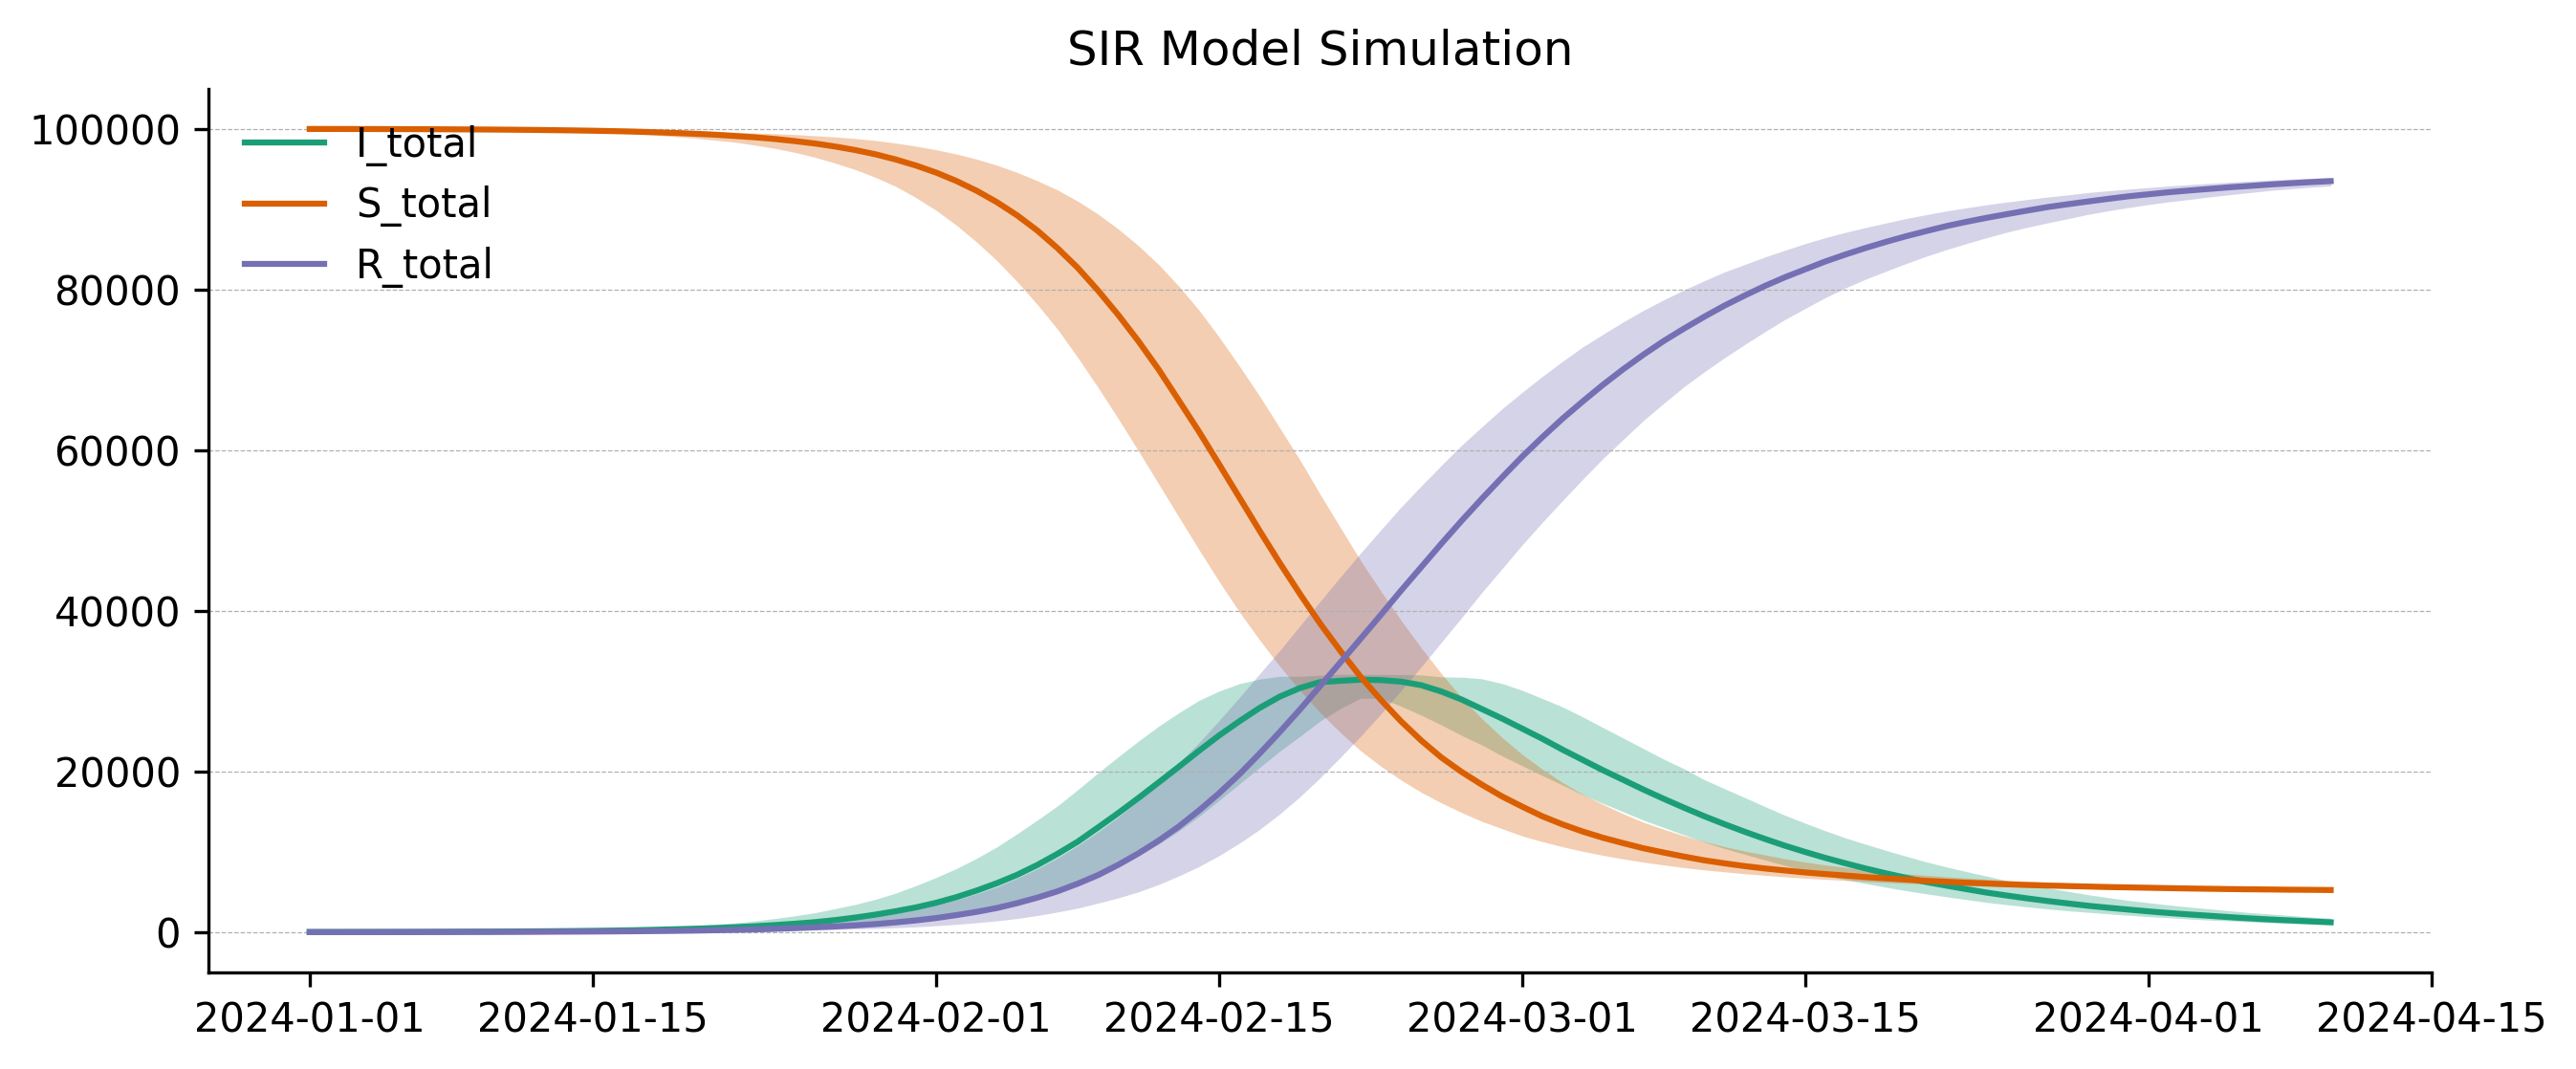

In [5]:
plot_quantiles(sir_results, columns=["I_total", "S_total", "R_total"], title='SIR Model Simulation')